In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Data/TourPackagePrediction/tour_package.csv')
data.drop(columns = 'CustomerID', inplace = True)
data.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [3]:
data.shape

(4888, 19)

In [4]:
data.isna().sum() # number of null values

ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [5]:
# Dropping null values
data.dropna(inplace=True)
data.shape

(4128, 19)

In [6]:
data.select_dtypes('O').nunique()

TypeofContact     2
Occupation        4
Gender            3
ProductPitched    5
MaritalStatus     4
Designation       5
dtype: int64

In [7]:
data.select_dtypes(exclude='O').apply(lambda x: x.unique())

ProdTaken                                                              [1, 0]
Age                         [41.0, 49.0, 37.0, 33.0, 32.0, 59.0, 30.0, 38....
CityTier                                                            [3, 1, 2]
DurationOfPitch             [6.0, 14.0, 8.0, 9.0, 30.0, 29.0, 33.0, 22.0, ...
NumberOfPersonVisiting                                        [3, 2, 1, 4, 5]
NumberOfFollowups                              [3.0, 4.0, 2.0, 5.0, 1.0, 6.0]
PreferredPropertyStar                                         [3.0, 4.0, 5.0]
NumberOfTrips               [1.0, 2.0, 7.0, 5.0, 6.0, 3.0, 4.0, 19.0, 21.0...
Passport                                                               [1, 0]
PitchSatisfactionScore                                        [2, 3, 5, 4, 1]
OwnCar                                                                 [1, 0]
NumberOfChildrenVisiting                                 [0.0, 2.0, 1.0, 3.0]
MonthlyIncome               [20993.0, 20130.0, 17090.0, 17909.0,

In [8]:
data.select_dtypes('O').apply(lambda x: x.unique())

TypeofContact                       [Self Enquiry, Company Invited]
Occupation        [Salaried, Free Lancer, Small Business, Large ...
Gender                                      [Female, Male, Fe Male]
ProductPitched        [Deluxe, Basic, Standard, Super Deluxe, King]
MaritalStatus                [Single, Divorced, Married, Unmarried]
Designation           [Manager, Executive, Senior Manager, AVP, VP]
dtype: object

In [9]:
## Replacing Fe Male with Female
data['Gender'] = data['Gender'].apply(lambda x: 'Female' if x == 'Fe Male' else x)

In [10]:
## Replacing Unmarried with single
data['MaritalStatus'] = data['MaritalStatus'].apply(lambda x: 'Single' if x == 'Unmarried' else x)

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ProdTaken,4128.0,0.193072,0.394757,0.0,0.0,0.0,0.0,1.0
Age,4128.0,37.231831,9.174521,18.0,31.0,36.0,43.0,61.0
CityTier,4128.0,1.663275,0.920640,1.0,1.0,1.0,3.0,3.0
DurationOfPitch,4128.0,15.584787,8.398142,5.0,9.0,14.0,20.0,127.0
NumberOfPersonVisiting,4128.0,2.949370,0.718818,1.0,2.0,3.0,3.0,5.0
NumberOfFollowups,4128.0,3.741521,1.006786,1.0,3.0,4.0,4.0,6.0
PreferredPropertyStar,4128.0,3.578488,0.795031,3.0,3.0,3.0,4.0,5.0
NumberOfTrips,4128.0,3.295300,1.856300,1.0,2.0,3.0,4.0,22.0
Passport,4128.0,0.295300,0.456233,0.0,0.0,0.0,1.0,1.0
PitchSatisfactionScore,4128.0,3.060804,1.363064,1.0,2.0,3.0,4.0,5.0


In [12]:
obj_cols = data.select_dtypes('O').columns
n_cols = data.select_dtypes(exclude='O').columns

In [13]:
data['ProdTaken'].value_counts()

0    3331
1     797
Name: ProdTaken, dtype: int64

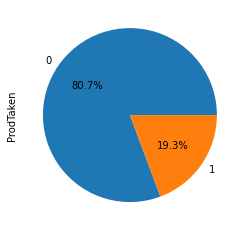

In [14]:
data['ProdTaken'].value_counts().plot.pie(autopct='%1.1f%%');

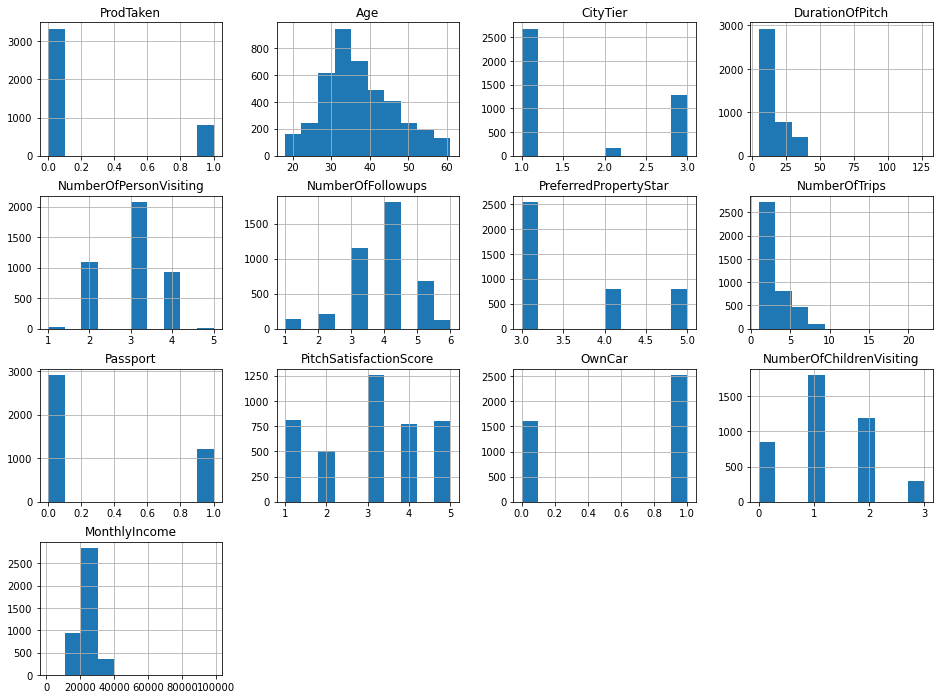

In [15]:
data.hist(figsize=(16,12));

In [16]:
con_cols = ['Age', 'DurationOfPitch','NumberOfTrips','MonthlyIncome']
dis_cols = list(set(n_cols)-set(con_cols))

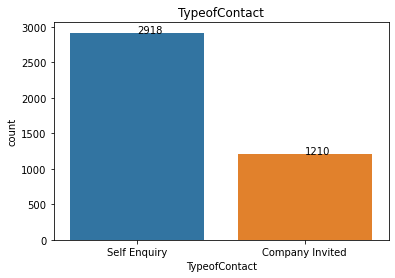

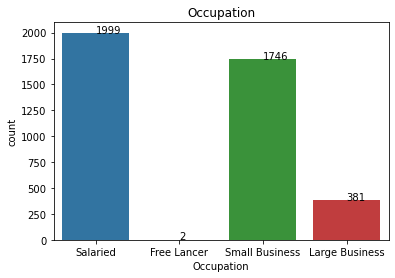

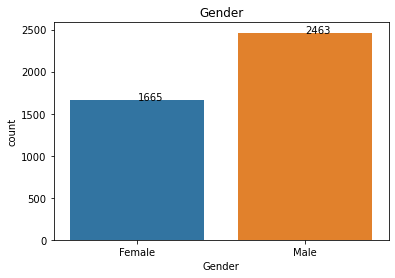

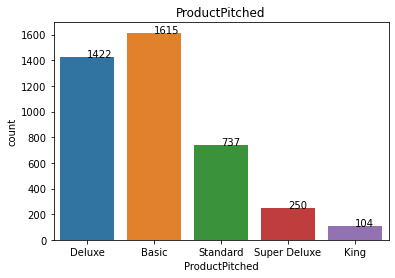

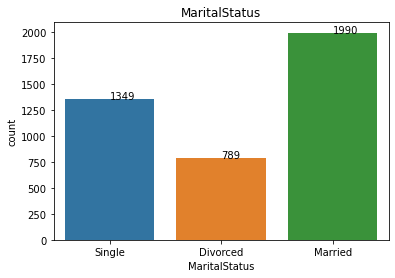

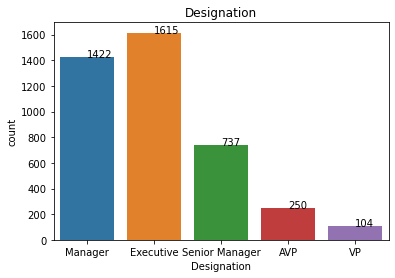

In [17]:
for col in obj_cols:
    f = sns.countplot(x=col,data=data)
    plt.title(col)
    for i in f.patches:
        x = (i.get_x() + i.get_width()/2)
        y = i.get_y() + i.get_height()    
        plt.annotate(i.get_height(),(x,y))
    plt.show()

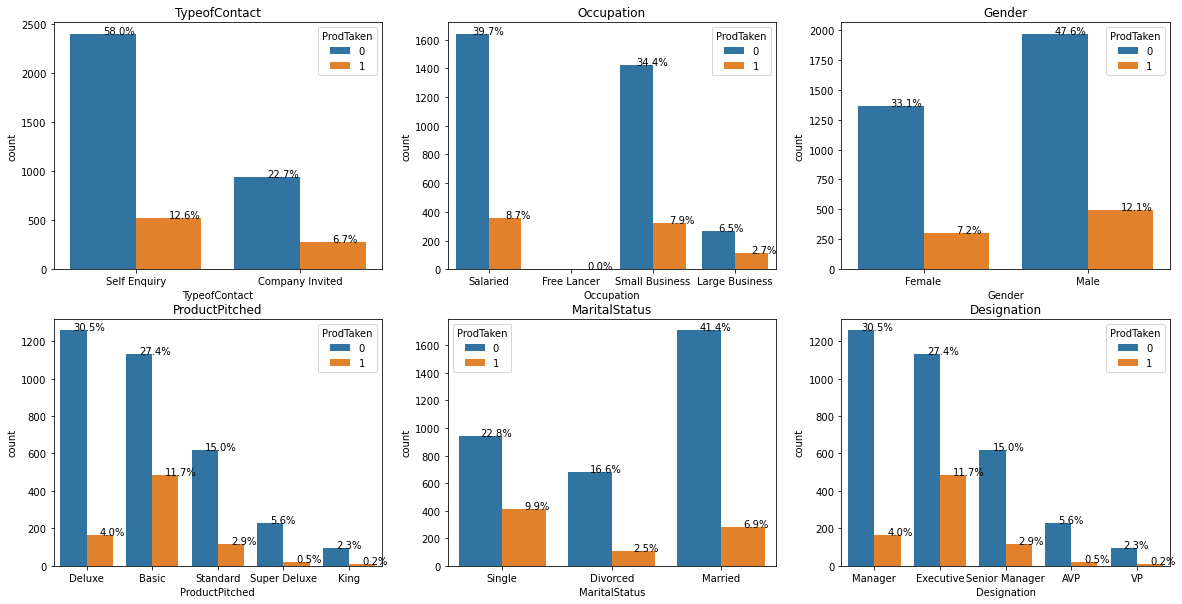

In [18]:
plt.figure(figsize=(20,10))
for i,col in enumerate(obj_cols):
    plt.subplot(2,3,i+1)
    ax = sns.countplot(x=col, data = data,hue='ProdTaken')
    plt.title(col)
    for p in ax.patches:
        perc = '{:.1f}%'.format(100*p.get_height()/len(data[col]))
        x = p.get_x()+p.get_width() /2
        y = p.get_y()+p.get_height()
        plt.annotate(perc,(x,y))

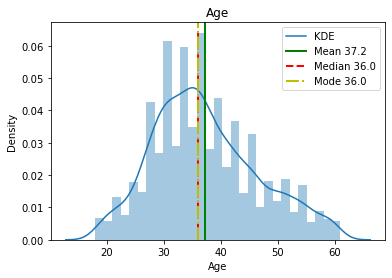

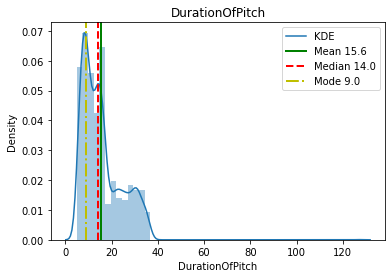

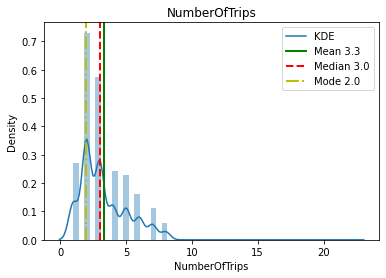

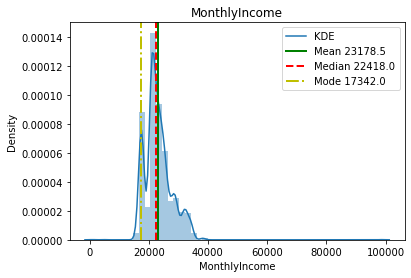

In [19]:
for col in con_cols:
    mean = data[col].mean()
    median = data[col].median()
    mode = data[col].mode().values[0]
    sns.distplot(data[col])
    plt.axvline(mean,color='g',ls='-',lw=2)
    plt.axvline(median,color='r',ls='--',lw=2)
    plt.axvline(mode,color='y',ls='-.',lw=2)
    plt.legend({'KDE':'','Mean %.1f'%mean:mean,'Median %.1f'%median:median,'Mode %.1f'%mode:mode,})
    plt.title(col)
    plt.show()

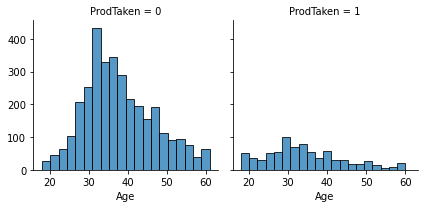

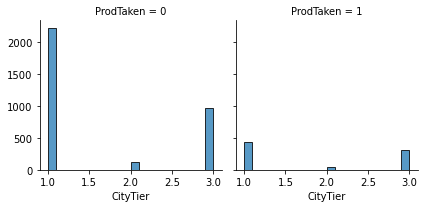

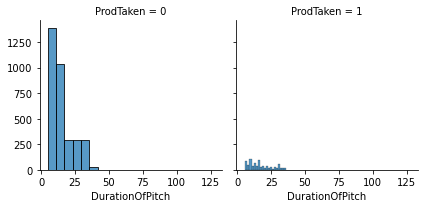

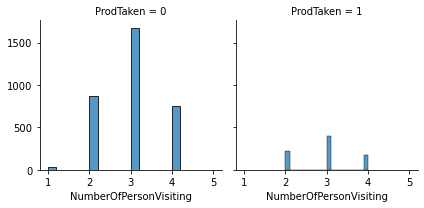

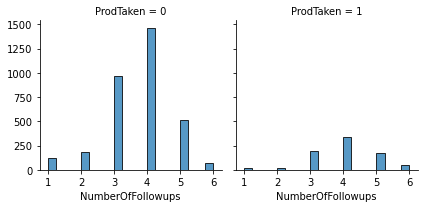

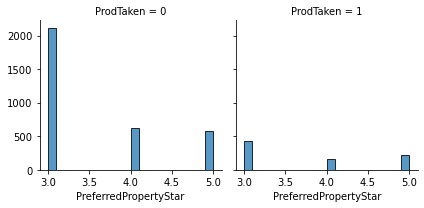

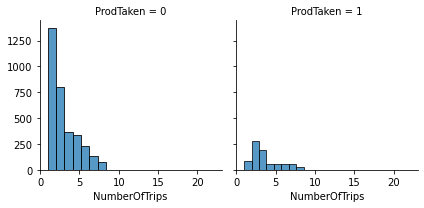

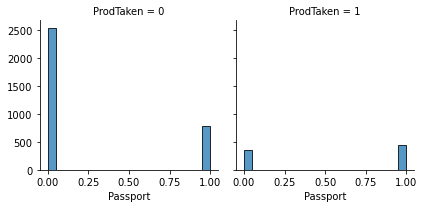

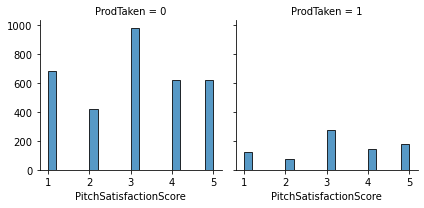

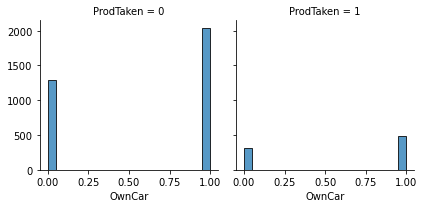

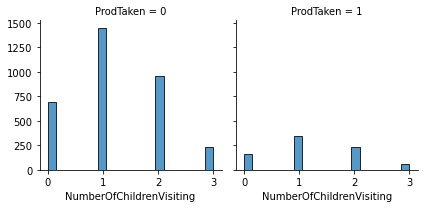

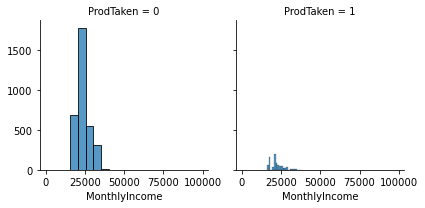

In [20]:
for col in n_cols[1:]:
    fg = sns.FacetGrid(data=data,col='ProdTaken')
    fg.map(sns.histplot,col,bins=20)    
    plt.show()

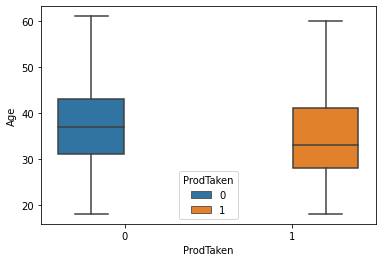

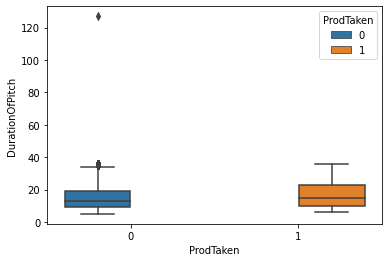

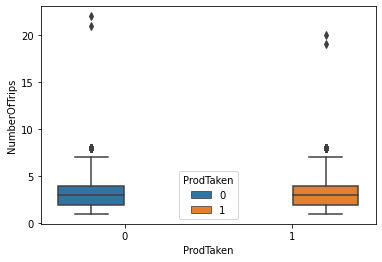

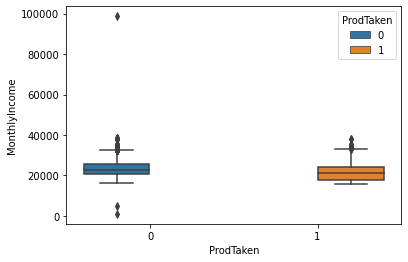

In [21]:
for i in con_cols:
    sns.boxplot(data=data[[i,'ProdTaken']], hue= 'ProdTaken', x = 'ProdTaken', y = i)
    plt.show()

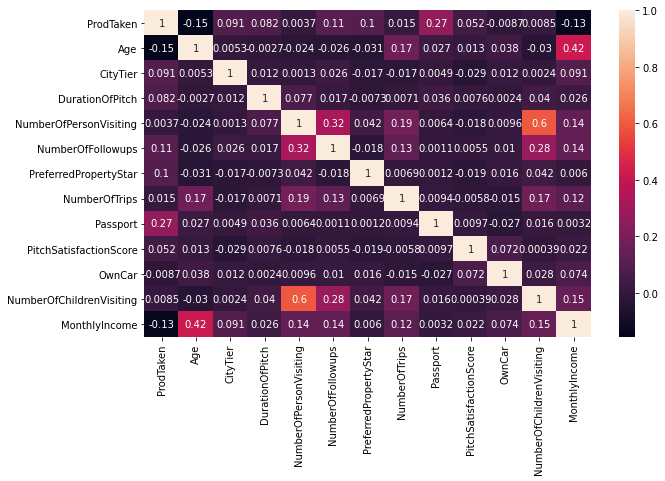

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True);

In [23]:
data1 = pd.get_dummies(data, columns= obj_cols, prefix_sep='_')

In [24]:
X_train, X_test, y_train, y_test = train_test_split(data1.drop(columns='ProdTaken'), data1['ProdTaken'],
                                                    test_size=0.2, random_state= 0)

In [25]:
from imblearn.over_sampling import SMOTENC

In [26]:
data.apply(lambda x: x.dtype)

ProdTaken                     int64
Age                         float64
TypeofContact                object
CityTier                      int64
DurationOfPitch             float64
Occupation                   object
Gender                       object
NumberOfPersonVisiting        int64
NumberOfFollowups           float64
ProductPitched               object
PreferredPropertyStar       float64
MaritalStatus                object
NumberOfTrips               float64
Passport                      int64
PitchSatisfactionScore        int64
OwnCar                        int64
NumberOfChildrenVisiting    float64
Designation                  object
MonthlyIncome               float64
dtype: object

In [27]:
sampler = SMOTENC(sampling_strategy='auto',
             random_state=0,
             k_neighbors=5,
             n_jobs=-1,
             categorical_features=[2,5,6,9,11,13,15,17] # column indices of the categorical variables
             )

X_resampled, y_sampled = sampler.fit_resample(data1.drop(columns='ProdTaken'), data1['ProdTaken'])
X_resampled.shape, y_sampled.shape

((6662, 33), (6662,))

In [28]:
Xtrain_resampled, Xtest_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_sampled,
                                                    test_size=0.2, random_state= 0)

In [29]:
def train(model, not_resampled= True, i = False):
    
    if not_resampled:
        md = model.fit(X_train, y_train)
        ytest_pred = md.predict(X_test)

        print('The training score:', md.score(X_train, y_train))
        print('The testing score: %.3f'%md.score(X_test, y_test))
        print('--'*60)
    
    else:
        md = model.fit(Xtrain_resampled, y_train_resampled)
        ytest_pred = md.predict(X_test)

        print('The training score on resampled data:', md.score(Xtrain_resampled, y_train_resampled))
        print('The testing score on resampled data: %.3f'%md.score(Xtest_resampled, y_test_resampled))
        print('The testing score: %.3f'%md.score(X_test, y_test))
        print('--'*60)
    
    print('For the testing data')
    print('The classification report:')
    print(classification_report(y_test, ytest_pred))
    print('The confusion matrix:')
    cnf2 = pd.DataFrame(confusion_matrix(y_test, ytest_pred), columns =['Predicted 0','Predicted 1'], index = ['True 0','True 1'])
    sns.heatmap(cnf2, annot=True,fmt='d',cbar=None, cmap='YlGn')
    plt.show()
    
    if i:
        print('--'*60)
        print('The feature importance')
        imp = pd.DataFrame(dtree.feature_importances_*100, index=X_train.columns, columns = ['Importance'])
        plt.figure(figsize=(10,8))
        imp['Importance'].sort_values().plot.barh()
        plt.xticks(np.arange(0,17,1))
        plt.grid()
        plt.show()
    return md

**Fitting on unsampled data**

The training score: 1.0
The testing score: 0.910
------------------------------------------------------------------------------------------------------------------------
For the testing data
The classification report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       670
           1       0.77      0.76      0.76       156

    accuracy                           0.91       826
   macro avg       0.85      0.85      0.85       826
weighted avg       0.91      0.91      0.91       826

The confusion matrix:


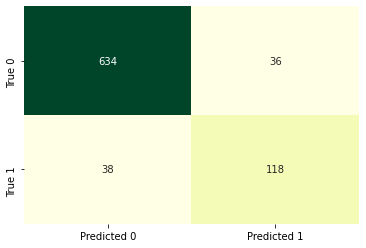

In [30]:
dtree = train(DecisionTreeClassifier(random_state=1))

The training score: 1.0
The testing score: 0.909
------------------------------------------------------------------------------------------------------------------------
For the testing data
The classification report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       670
           1       0.74      0.81      0.77       156

    accuracy                           0.91       826
   macro avg       0.85      0.87      0.86       826
weighted avg       0.91      0.91      0.91       826

The confusion matrix:


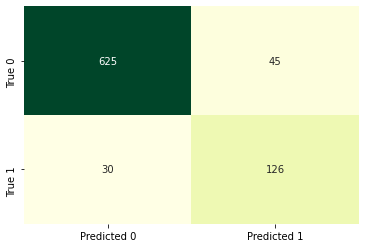

In [31]:
weights = {0:y_train.value_counts()[0]/y_train.value_counts()[1],1:1}
dtree2 = train(DecisionTreeClassifier(class_weight=weights, random_state=1))

The training score: 1.0
The testing score: 0.933
------------------------------------------------------------------------------------------------------------------------
For the testing data
The classification report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       670
           1       0.95      0.69      0.80       156

    accuracy                           0.93       826
   macro avg       0.94      0.84      0.88       826
weighted avg       0.93      0.93      0.93       826

The confusion matrix:


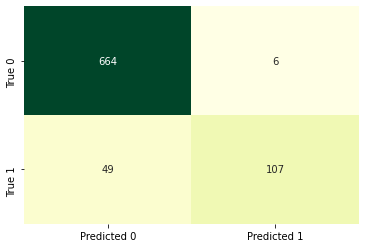

In [32]:
rf = train(RandomForestClassifier(n_estimators=500,random_state=1,class_weight=weights))

**Fitting on resampled data**

The training score on resampled data: 1.0
The testing score on resampled data: 0.891
The testing score: 0.958
------------------------------------------------------------------------------------------------------------------------
For the testing data
The classification report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       670
           1       0.85      0.94      0.89       156

    accuracy                           0.96       826
   macro avg       0.92      0.95      0.93       826
weighted avg       0.96      0.96      0.96       826

The confusion matrix:


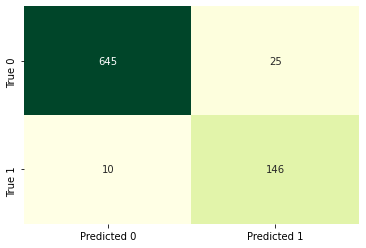

------------------------------------------------------------------------------------------------------------------------
The feature importance


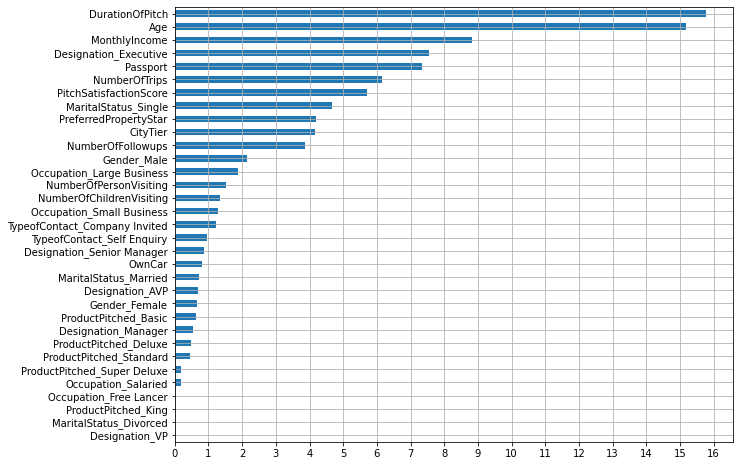

In [33]:
sdtree = train(DecisionTreeClassifier(random_state=1), False, True)

The training score on resampled data: 1.0
The testing score on resampled data: 0.953
The testing score: 0.979
------------------------------------------------------------------------------------------------------------------------
For the testing data
The classification report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       670
           1       0.93      0.96      0.95       156

    accuracy                           0.98       826
   macro avg       0.96      0.97      0.97       826
weighted avg       0.98      0.98      0.98       826

The confusion matrix:


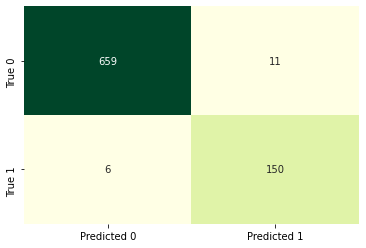

------------------------------------------------------------------------------------------------------------------------
The feature importance


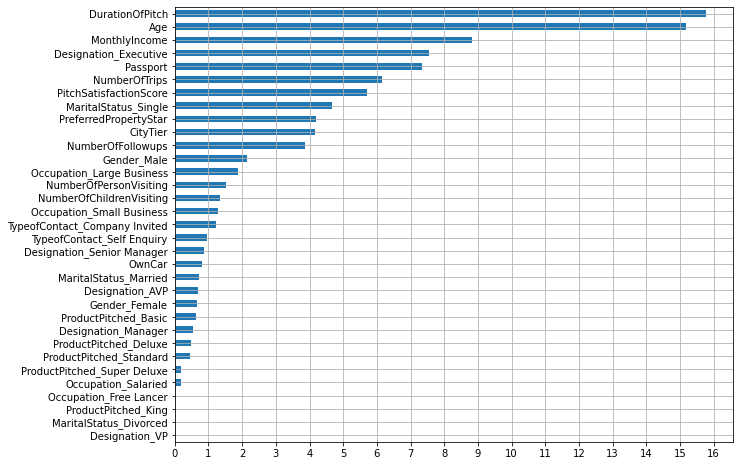

In [34]:
srf = train(RandomForestClassifier(n_estimators=500,random_state=1,class_weight=weights), False, True)

***As resampled data results in better classification, we use gridsearch to find best model***

In [35]:
params = {'criterion': ['gini','entropy'],
         'max_depth': [None,10,20,30,40,50],
         'min_samples_split': [2, 4]}
sgrid = GridSearchCV(DecisionTreeClassifier(), param_grid=params, n_jobs=1, verbose=3)
sgrid.fit(Xtrain_resampled, y_train_resampled)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END criterion=gini, max_depth=None, min_samples_split=2; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=None, min_samples_split=2; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=None, min_samples_split=2; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=None, min_samples_split=2; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=None, min_samples_split=2; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=None, min_samples_split=4; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=None, min_samples_split=4; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=None, min_samples_split=4; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=None, min_samples_split=4; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=None, min_samples_split=4; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, min_samples_split=2; total time=   0.0s
[CV 2

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_split': [2, 4]},
             verbose=3)

In [36]:
sgrid.best_score_

0.8866571536787958

In [37]:
sgrid.score(X_test,y_test)

0.9539951573849879

In [38]:
sgrid.best_params_

{'criterion': 'entropy', 'max_depth': 30, 'min_samples_split': 2}

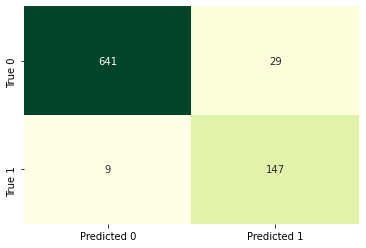

In [39]:
cnf = pd.DataFrame(confusion_matrix(y_test, sgrid.best_estimator_.predict(X_test)),
                    columns =['Predicted 0','Predicted 1'], index = ['True 0','True 1'])
sns.heatmap(cnf, annot=True,fmt='d',cbar=None, cmap='YlGn');

In [40]:
rf_params = {'bootstrap': [True, False],
             'max_depth': [10, 30, 50, 70, 90, 110, 130, 150, None],
             'max_features': ['auto', 'sqrt'],
             'n_estimators': [50, 100, 300, 500, 700, 900, 1000,1200]}
sgrid2 = GridSearchCV(RandomForestClassifier(), param_grid=rf_params, n_jobs=-1, verbose=3, cv=3)
sgrid2.fit(Xtrain_resampled, y_train_resampled)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 30, 50, 70, 90, 110, 130, 150, None],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [50, 100, 300, 500, 700, 900, 1000,
                                          1200]},
             verbose=3)

In [41]:
sgrid2.best_score_

0.951962302764216

In [42]:
sgrid2.score(X_test,y_test)

0.9842615012106537

In [43]:
sgrid2.best_params_

{'bootstrap': False,
 'max_depth': 90,
 'max_features': 'sqrt',
 'n_estimators': 1200}

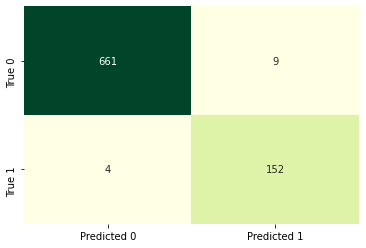

In [52]:
cnf = pd.DataFrame(confusion_matrix(y_test, sgrid2.best_estimator_.predict(X_test)),
                    columns =['Predicted 0','Predicted 1'], index = ['True 0','True 1'])
sns.heatmap(cnf, annot=True,fmt='d',cbar=None, cmap='YlGn');

In [53]:
rf_params2 = {'bootstrap': [False],
             'max_depth': [70, 75, 80, 90, 100, 105, 110],
             'max_features': ['sqrt'],
             'n_estimators': [1050, 1100, 1150, 1175, 1200, 1225, 1250, 1300, 1350]}
sgrid3 = GridSearchCV(RandomForestClassifier(), param_grid=rf_params2, n_jobs=-1, verbose=3, cv=3)
sgrid3.fit(Xtrain_resampled, y_train_resampled)

Fitting 3 folds for each of 63 candidates, totalling 189 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [False],
                         'max_depth': [70, 75, 80, 90, 100, 105, 110],
                         'max_features': ['sqrt'],
                         'n_estimators': [1050, 1100, 1150, 1175, 1200, 1225,
                                          1250, 1300, 1350]},
             verbose=3)

In [54]:
sgrid3.best_score_

0.9515866105272409

In [55]:
sgrid3.score(X_test,y_test)

0.9842615012106537

In [56]:
sgrid3.best_params_

{'bootstrap': False,
 'max_depth': 100,
 'max_features': 'sqrt',
 'n_estimators': 1250}

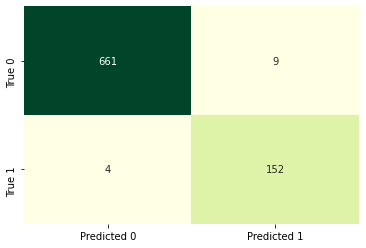

In [57]:
cnf = pd.DataFrame(confusion_matrix(y_test, sgrid3.best_estimator_.predict(X_test)),
                    columns =['Predicted 0','Predicted 1'], index = ['True 0','True 1'])
sns.heatmap(cnf, annot=True,fmt='d',cbar=None, cmap='YlGn');

**Saving a data template and the best model**

In [49]:
template = pd.DataFrame(columns=X_train.columns)
template.loc[0,:]=0
template

,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,...,ProductPitched_Standard,ProductPitched_Super Deluxe,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Designation_AVP,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
pd.to_pickle(sgrid3.best_estimator_, 'TourPackagePredictor')
template.to_csv('TPP_template.csv',index=False)

In [51]:
import pickle

model = pd.read_pickle('TourPackagePredictor')
with open('tpp.pkl','wb') as f:
    f = pickle.dump(model, f)